In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from theano.tensor import eq

### Hierachical MCMC Computation of relative model probability

In [3]:
y = np.repeat([0, 1], [3,6])

In [8]:
with pm.Model() as model:
    
    model_index = pm.Categorical('model_index', p=[0.5, 0.5])
    
    kappa = 12
    
    omega = pm.math.switch(eq(model_index, 0), 0.25, 0.75)
    
    theta = pm.Beta('theta', omega * (kappa - 2) + 1, (1-omega)*(kappa - 2) + 1)
    
    y = pm.Bernoulli('y', theta, observed=y)

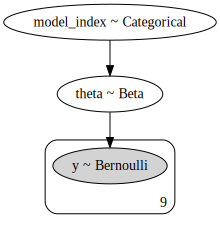

In [9]:
pm.model_to_graphviz(model)

In [10]:
with model:
    trace = pm.sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [model_index]
>NUTS: [theta]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:03<00:00, 6317.81draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f747438>,
      dtype=object)

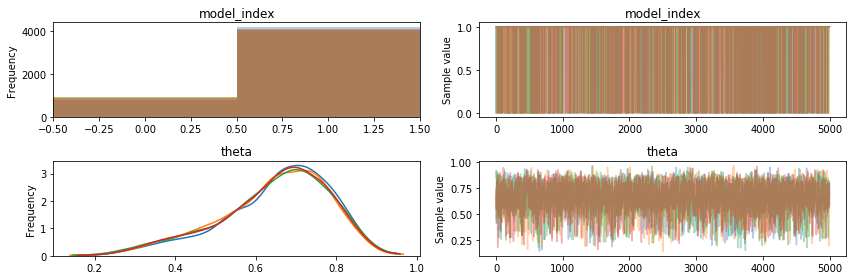

In [13]:
pm.traceplot(trace)

In [16]:
trace_df = pm.trace_to_dataframe(trace).set_index('model_index')

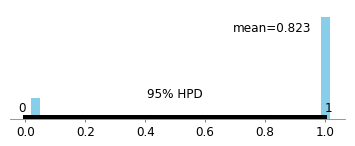

In [26]:
pm.plot_posterior(np.asanyarray(trace_df.index))

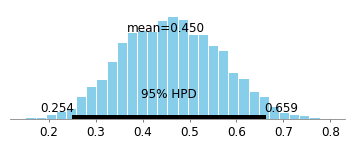

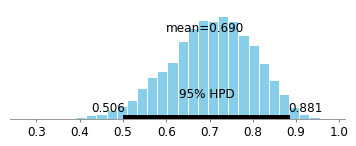

In [31]:
for midx in [0,1]:
    pm.plot_posterior(np.asarray(trace_df[trace_df.index == midx].values.ravel()))

### Model 2- Two theta variables without pseudo priors

In [73]:
y = np.repeat([0,1], [3,6])

In [74]:
with pm.Model() as model:
    
    model_idx = pm.Categorical('model_idx', p=[0.5, 0.5])
    
    omega_0 = 0.25
    kappa_0 = 12
    
    theta_0 = pm.Beta(
        'theta_0', 
        omega_0 * (kappa_0 - 2) + 1,
        (1 - omega_0) * (kappa_0 - 2) + 1
    )
    
    omega_1 = 0.75
    kappa_1 = 12
    theta_1 = pm.Beta(
        'theta_1', 
        omega_1 * (kappa_1 - 2) + 1,
        (1 - omega_1) * (kappa_1 - 2) + 1
    )
    
    theta = pm.math.switch(eq(model_idx, 0), theta_0, theta_1)
    
    y = pm.Bernoulli('y', theta, observed=y)

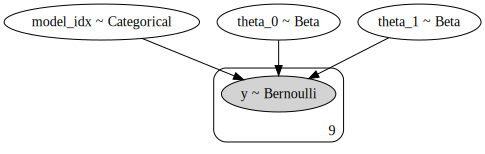

In [75]:
pm.model_to_graphviz(model)

In [76]:
with model:
    trace = pm.sample(10000, nuts_kwargs={'target_accept': 0.95})

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [model_idx]
>NUTS: [theta_1, theta_0]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:11<00:00, 3534.23draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ba30c50>,
      dtype=object)

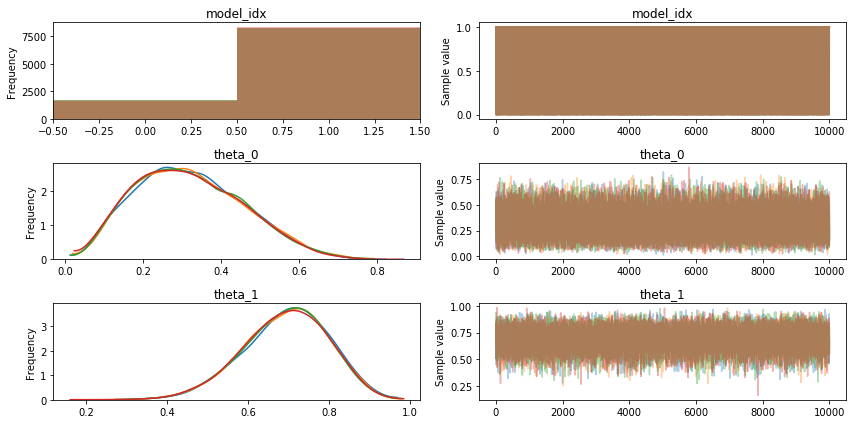

In [77]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c0860f0>,
      dtype=object)

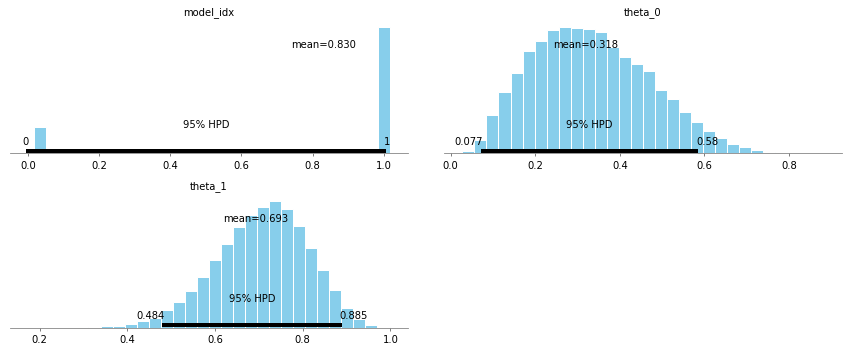

In [78]:
pm.plot_posterior(trace)

### Model 3: Two theta variables with pseudo priors = true prior

Coin is flipped 30 times, resulting in 17 heads

In [80]:
y = np.repeat([0, 1], [13, 17])

In [81]:
with pm.Model() as model:
    model_idx = pm.Categorical('model_idx', p=[0.5, 0.5])
    
    omega_0_true = 0.10
    omega_0_pseudo = 0.10
    omega_0 = pm.math.switch(eq(model_idx, 0), omega_0_true, omega_0_pseudo)
    
    kappa_0_true = 20
    kappa_0_pseudo = 20
    kappa_0 = pm.math.switch(eq(model_idx, 0), kappa_0_true, kappa_0_pseudo)
    
    theta_0 = pm.Beta(
        'theta_0', 
        omega_0 * (kappa_0 - 2) + 1,
        (1 - omega_0) * (kappa_0 - 2) + 1
    )
    
    omega_1_true = 0.9
    omega_1_pseudo = 0.9
    omega_1 = pm.math.switch(eq(model_idx, 1), omega_1_true, omega_1_pseudo)
    
    kappa_1_true = 20
    kappa_1_pseudo = 20
    kappa_1 = pm.math.switch(eq(model_idx, 1), kappa_1_true, kappa_1_pseudo)
    
    theta_1 = pm.Beta(
        'theta_1', 
        omega_1 * (kappa_1 - 2) + 1,
        (1 - omega_1) * (kappa_1 - 2) + 1
    )
    
    theta = pm.math.switch(eq(model_idx, 0), theta_0, theta_1)
    
    y = pm.Bernoulli('y', theta, observed=y)
    

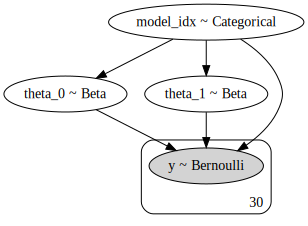

In [82]:
pm.model_to_graphviz(model)

In [89]:
with model:
    trace = pm.sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [model_idx]
>NUTS: [theta_1, theta_0]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:04<00:00, 4481.24draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1355f1128>,
      dtype=object)

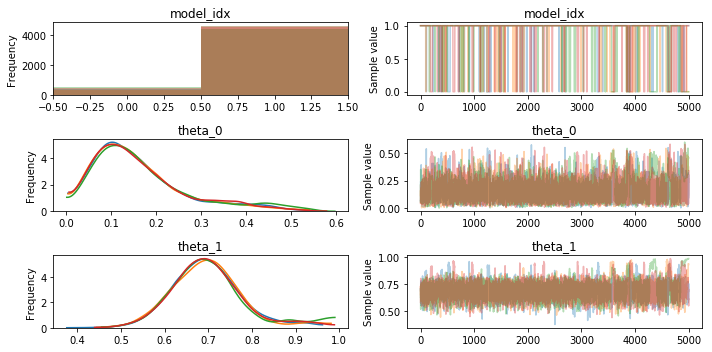

In [93]:
pm.traceplot(trace, figsize=(10,5))